### COVID-19 EDUCATION IMPACT SURVEY DATA INVESTIGATION & VISUALIZATION


## by ADELEKE ADEKOLA EMMANUEL

## Industry: Education

#### About Dataset
Contains data crowdsourced from Venezuelans through the Premise Data mobile application. The survey is presented only once to users and aims to capture the impact of COVID-19 on children's education.

#### Data Source
https://data.humdata.org/dataset/open_one_time_covid_education_impact

### Table of Contents
<ul
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Data Assesment Outcome">Data Assesment Outcome</a></li>
<li><a href="#Data Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset is a survey on the impact of covid-19 on education and how over 4000 people reacted to it.

### Question(s) for Analysis

1. Which gender responded more to the survey?
2. Would you say the said gender responded more because of their unemployment status?
3. What percentage of the population are unemployed?
4. What percentage of the population are financially okay?
5. Were children attending face to face classes during covid-19?
6. Did teachers leave the educational system during covid-19?
7. What percentage of teachers and students had internet connection to join online classes?

We will be using Python libraries for the analysis, such as Pandas, NumPy, Matplotlib and Seaborn. 


In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='wrangling'></a>
# Data Wrangling


### Preliminary Wrangling
General Properties
First, the data is read from the csv file and the first five rows are illustrated below.

In [3]:
#import dataset and view the first 5 rows
covedu = pd.read_csv('covid_education.csv')
covedu.head()

,submission_id,submission_date,gender,age,geography,financial_situation,education,employment_status,submission_state,are_there_children_0_to_2_yrs_out_of_educational_system,...,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
0,4570534489882624,2021-03-17,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,...,0,0,0,1,1,0,0,0,0,0
1,6440166989496320,2021-03-29,Male,26 to 35 years old,Suburban/Peri-urban,I cannot afford enough food for my family,University or college degree completed,I am unemployed,Miranda,0,...,1,0,1,0,1,1,0,0,0,0
2,5001167808757760,2021-03-18,Female,26 to 35 years old,City center or metropolitan area,"I can comfortably afford food, clothes, and fu...",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,1,...,1,1,1,0,1,0,1,0,0,1
3,5524933164924928,2021-03-24,Male,36 to 45 years old,Suburban/Peri-urban,"I can afford food, but nothing else",University or college degree completed,"I work full-time, either as an employee or sel...",Miranda,0,...,1,1,1,0,1,0,0,0,0,0
4,5032515751641088,2021-03-18,Female,Over 45 years old,Suburban/Peri-urban,"I can afford food and regular expenses, but no...",University or college degree completed,I am unemployed,Miranda,0,...,1,0,1,0,1,1,0,0,0,1


In [4]:
#checking for data information
covedu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 27 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   submission_id                                                           4436 non-null   int64 
 1   submission_date                                                         4436 non-null   object
 2   gender                                                                  4436 non-null   object
 3   age                                                                     4436 non-null   object
 4   geography                                                               4436 non-null   object
 5   financial_situation                                                     4436 non-null   object
 6   education                                                               4436 non-null   

The above shows there are 27 columns in the dataset, which 17 are integers while 10 are objects

In [5]:
#Checking for outliers and other statistical measures in the dataset
covedu.describe()

,submission_id,are_there_children_0_to_2_yrs_out_of_educational_system,were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school,are_there_children_who_stopped_enrolling_in_primary_education,are_there_children_who_stopped_enrolling_in_secondary_education,are_children_attending_face_to_face_classes,can_children_observe_deterioration_of_basic_services_of_school,are_children_3_to_17_yrs_dealing_with_irregular_school_activity,are_children_being_teached_by_unqualified_people,did_teachers_leave_the_educational_system,do_school_and_the_teachers_have_internet_connection,do_children_have_internet_connection,do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity,does_home_shows_severe_deficit_of_electricity,does_home_shows_severe_deficit_of_internet,do_children_3_to_17_yrs_miss_class_or_in_lower_grade,are_children_promoted_with_a_modality_different_from_formal_evaluation
count,4.436000e+03,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000
mean,5.633310e+15,0.294860,0.613165,0.206492,0.194319,0.163661,0.800496,0.643147,0.316501,0.664337,0.560415,0.628494,0.665464,0.284491,0.579125,0.246393,0.427187
std,6.466765e+14,0.456031,0.487080,0.404834,0.395720,0.370009,0.399673,0.479125,0.465163,0.472275,0.496393,0.483262,0.471881,0.451222,0.493755,0.430959,0.494726
min,4.503608e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.076908e+15,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.642197e+15,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,6.187797e+15,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,6.755339e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above shows there is no outlier.

In [6]:
#Checking the data shape
covedu.shape

(4436, 27)

The shape shows this dataset contains 27 columns and 4436 rows in total.

In [8]:
#Checking for duplicated entries
covedu.duplicated().sum()

0

No duplicates

In [9]:
#Checking for missing data
covedu.isna().sum()

submission_id                                                             0
submission_date                                                           0
gender                                                                    0
age                                                                       0
geography                                                                 0
financial_situation                                                       0
education                                                                 0
employment_status                                                         0
submission_state                                                          0
are_there_children_0_to_2_yrs_out_of_educational_system                   0
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school           0
are_there_children_who_stopped_enrolling_in_primary_education             0
are_there_children_who_stopped_enrolling_in_secondary_education           0
are_children

No missing data.

<a id='Data Assesment Outcome'></a>
### Data Assesment Outcome
##### Quality Issues

#### Some columns are not needed for this analysis
are_there_children_0_to_2_yrs_out_of_educational_system              
were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school            
are_there_children_who_stopped_enrolling_in_primary_education              
are_there_children_who_stopped_enrolling_in_secondary_education            
can_children_observe_deterioration_of_basic_services_of_school            
do_children_3_and_17_yrs_receive_regular_school_meals                     
are_there_teachers_at_scheduled_class_hours                               
are_children_3_to_17_yrs_dealing_with_irregular_school_activity    
are_children_being_teached_by_unqualified_people
do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity     
does_home_shows_severe_deficit_of_electricity                             
does_home_shows_severe_deficit_of_internet                                
do_children_3_to_17_yrs_miss_class_or_in_lower_grade                      
are_children_promoted_with_a_modality_different_from_formal_evaluation    

#### Some column names need to be changed for clearer identification
submission_id 
submission_date 
geography  
submission_state 
are_children_attending_face_to_face_classes 
did_teachers_leave_the_educational_system  
do_school_and_the_teachers_have_internet_connection    
do_children_have_internet_connection  

<a id='Data Cleaning'></a>
## Data Cleaning & PCA
The programmatic data cleaning process:  

Define   
Code   
Test   

In [10]:
#A copy of the dataset
covedu1 = covedu.copy()

In [11]:
#Dropping all unused columns
covedu1.drop(['are_there_children_0_to_2_yrs_out_of_educational_system',
    'were_children_3_to_17_yrs_enrolled_and_did_not_return_to_school',
    'are_there_children_who_stopped_enrolling_in_primary_education',
    'are_there_children_who_stopped_enrolling_in_secondary_education',
    'can_children_observe_deterioration_of_basic_services_of_school',         
    'do_children_3_and_17_yrs_receive_regular_school_meals',
    'are_there_teachers_at_scheduled_class_hours',                               
    'are_children_3_to_17_yrs_dealing_with_irregular_school_activity',   
    'are_children_being_teached_by_unqualified_people',
    'do_children_3_to_17_yrs_miss_virtual_class_due_to_lack_of_electricity',  
    'does_home_shows_severe_deficit_of_electricity',                      
    'does_home_shows_severe_deficit_of_internet',                    
    'do_children_3_to_17_yrs_miss_class_or_in_lower_grade',            
    'are_children_promoted_with_a_modality_different_from_formal_evaluation'], 
             axis = 1, inplace = True)

In [12]:
#Check for dropped columns
covedu1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   submission_id                                        4436 non-null   int64 
 1   submission_date                                      4436 non-null   object
 2   gender                                               4436 non-null   object
 3   age                                                  4436 non-null   object
 4   geography                                            4436 non-null   object
 5   financial_situation                                  4436 non-null   object
 6   education                                            4436 non-null   object
 7   employment_status                                    4436 non-null   object
 8   submission_state                                     4436 non-null   object
 9

Unused columns dropped  
We now have 13 columns to work with

In [23]:
#Changing the column names for better identification
covedu1.rename(columns={'gender':'GENDER',
                        'age':'AGE'},
                            inplace=True, errors='raise')

In [24]:
#Check for the new column names
covedu1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   ID                                                   4436 non-null   int64 
 1   SURVEY DATE                                          4436 non-null   object
 2   GENDER                                               4436 non-null   object
 3   AGE                                                  4436 non-null   object
 4   SURVEY REGION                                        4436 non-null   object
 5   FINANCIAL SITUATION                                  4436 non-null   object
 6   EDUCATION STATUS                                     4436 non-null   object
 7   EMPLOYMENT STATUS                                    4436 non-null   object
 8   SURVEY STATE                                         4436 non-null   object
 9

Now we can start with our Exploratory Data Analysis

<a id='eda'></a>
## Exploratory Data Analysis
> **Tips** Here we'll perform some analysis on the cleaned data, using statistical computation and visualization.

#### EDA Questions
1. Which gender responded more to the survey?
2. Would you say the said gender responded more because of their unemployment status?
3. What percentage of the population are unemployed?
4. What percentage of the population are financially okay?
5. Were children attending face to face classes during covid-19?
6. Did teachers leave the educational system during covid-19?
7. What percentage of teachers and students had internet connection to join online classes?

### QUESTION 1
Which gender responded more to the survey?

In [36]:
#Which gender responded more to the survey?
#To do this, let's plot a bar chart to see this
gencount = covedu1.groupby(['GENDER'])['GENDER'].count()

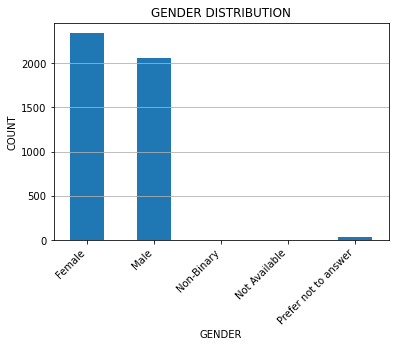

In [43]:
gencount.plot(kind='bar')
plt.title("GENDER DISTRIBUTION")
plt.xlabel("GENDER")
plt.ylabel("COUNT")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')#Add gridlines for better visualization

#### Female gender responded more to the survey.

### QUESTION 2
Would you say the female gender responded more because of their employment status?

In [78]:
# Would you say the female gender responded more because of their employment status?
#To answer this, check for female gender employment status
# Filter data for females only
female_covedu1 = covedu1[covedu1['GENDER'] == 'Female']

# Group and count employment status for females
female_employment_counts = female_covedu1['EMPLOYMENT STATUS'].value_counts()
print(female_employment_counts)


I work part-time                                              556
I work full-time, either as an employee or self-employed      479
I am unemployed                                               327
I do housework                                                325
I am a student                                                287
I am a student and I work part-time                           189
None of the above                                              85
I am retired                                                   80
I am unable to work due to long-term illness or disability      9
I am doing community or military service                        2
Unemployed                                                      1
Employed full-time                                              1
Name: EMPLOYMENT STATUS, dtype: int64


In [88]:
covedu1['EMPLOYMENT STATUS'].unique()

array(['I am unemployed',
       'I work full-time, either as an employee or self-employed',
       'I do housework', 'I work part-time', 'I am retired',
       'I am a student and I work part-time', 'I am a student',
       'None of the above', 'I am doing community or military service',
       'I am unable to work due to long-term illness or disability',
       'Not Available', 'Employed full-time', 'Retired', 'Student',
       'Unemployed'], dtype=object)

In [94]:
covedu1['AGE'].unique()

array(['Over 45 years old', '26 to 35 years old', '36 to 45 years old',
       '16 to 25 years old', 'Under 16', 'Not Available'], dtype=object)

In [74]:
# Define aliases
value_aliases = {'I work part-time, either as an employee or self-employed': 'I work part-time',
                 'I work full-time, either as an employee or self-employed ': 'I work full-time',
                'I do housework, fulfilling domestic tasks, looking after children':'I do housework'}

# Replace values with aliases
covedu1['EMPLOYMENT STATUS'] = covedu1['EMPLOYMENT STATUS'].replace(value_aliases)

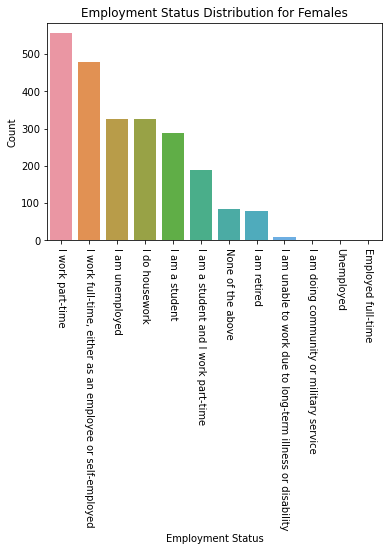

In [85]:
# Create the bar chart
sns.barplot(female_employment_counts.index, female_employment_counts.values)

# Add labels and title
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.title("Employment Status Distribution for Females")
plt.xticks(rotation=270)  
plt.show()

We can't generalize that Female gender responded more because of thier employment status

### QUESTION 3
What percentage of the population are unemployed?

In [91]:
# What percentage of the population are unemployed?
# Let's check for the unemployed in the population we have
values_to_sum = ['I am unemployed',
                 'I do housework',
                'I am a student',
                'I am retired',
                'I am unable to work due to long-term illness or disability',
                'I am doing community or military service',
                'Unemployed']

unemployed1 = covedu1[covedu1['EMPLOYMENT STATUS'].isin(values_to_sum)]['EMPLOYMENT STATUS'].count()
print(unemployed1)

1718


In [92]:
# From our data information, we have 4436 as the total population survey
pop = 4436

In [93]:
# To calculate the percentage of the unemployed in the population survey
per_pop_unemp = (unemployed1/pop)*100
print(per_pop_unemp)

38.72858431018936


We have 38.73% of unemployed people in the population survey

Here is another condition we could have considered, are those below 16years employable?

### QUESTION 4
What percentage of the population are financially okay?

In [95]:
# What percentage of the population are financially okay?
# Let's check the reponse of the population to their financial situation
covedu1['FINANCIAL SITUATION'].unique()

array(['I can afford food and regular expenses, but nothing else',
       'I cannot afford enough food for my family',
       'I can comfortably afford food, clothes, and furniture, and I have savings',
       'I can afford food, but nothing else',
       'I can comfortably afford food, clothes, and furniture, but I don’t have savings',
       'I can afford food, regular expenses, and clothes, but nothing else',
       'Prefer not to answer', 'Not Available'], dtype=object)

In [96]:
# Let's check for the sum of those who are financially okay in the population we have

fin_values_to_sum = ['I can afford food and regular expenses, but nothing else',
                 'I can comfortably afford food, clothes, and furniture, and I have savings',
                'I can comfortably afford food, clothes, and furniture, but I don’t have savings',
                'I can afford food, regular expenses, and clothes, but nothing else']

finok = covedu1[covedu1['FINANCIAL SITUATION'].isin(fin_values_to_sum)]['FINANCIAL SITUATION'].count()
print(finok)

1588


In [97]:
# To calculate the percentage of those who are financially okay in the population survey
per_fin_ok = (finok/pop)*100
print(per_fin_ok)

35.79801623083859


We have 35.8% of the population survey who are financially okay

### QUESTION 5
What percentage of children attended face to face classes?

In [98]:
# What percentage of children attended face to face classes?
covedu1['ARE CHILDREN ATTENDING FACE TO FACE CLASSES'].unique()

array([0, 1], dtype=int64)

In [101]:
# Define aliases (dictionary)
value_aliases1 = {0: 'No',
                 1: 'Yes'}

# Replace values with aliases
covedu1['ARE CHILDREN ATTENDING FACE TO FACE CLASSES'] = covedu1['ARE CHILDREN ATTENDING FACE TO FACE CLASSES'].replace(value_aliases1)

In [102]:
covedu1['ARE CHILDREN ATTENDING FACE TO FACE CLASSES'].unique()

array(['No', 'Yes'], dtype=object)

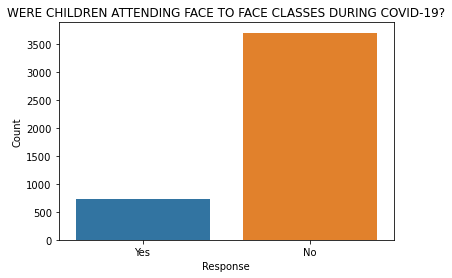

In [106]:
# Let's count Yes and No responses
yes = len(covedu1[covedu1['ARE CHILDREN ATTENDING FACE TO FACE CLASSES'] == 'Yes'])
no = len(covedu1[covedu1['ARE CHILDREN ATTENDING FACE TO FACE CLASSES'] == 'No'])

# Create a bar chart
sns.barplot(x=['Yes', 'No'], y=[yes, no])

#To add labels and title
plt.xlabel("Response")
plt.ylabel("Count")
plt.title("WERE CHILDREN ATTENDING FACE TO FACE CLASSES DURING COVID-19?")

# Show the plot
plt.show()

This shows that many children did not attend face to face class during the covid-19

### QUESTION 6
Did teachers leave the educational system during covid-19?

In [107]:
# Did teachers leave the educational system during covid-19?
covedu1['DID TEACHERS LEAVE THE EDUCATIONAL SYSTEM'].unique()

array([0, 1], dtype=int64)

In [108]:
# Define aliases
value_aliases1 = {0: 'No',
                 1: 'Yes'}

# Replace values with aliases
covedu1['DID TEACHERS LEAVE THE EDUCATIONAL SYSTEM'] = covedu1['DID TEACHERS LEAVE THE EDUCATIONAL SYSTEM'].replace(value_aliases1)

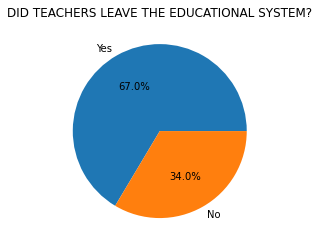

In [124]:
# Let's count occurrences of "Yes" and "No" responses
yes2 = covedu1['DID TEACHERS LEAVE THE EDUCATIONAL SYSTEM'].value_counts()['Yes']
no2 = covedu1['DID TEACHERS LEAVE THE EDUCATIONAL SYSTEM'].value_counts()['No']

#Create a list of response labels and counts
response_labels = ['Yes', 'No']
counts = [yes2, no2]

#Let's use pie chart to represent this
plt.pie(counts, labels=response_labels, autopct=lambda pct: f"{np.ceil(pct)}%")
plt.title("DID TEACHERS LEAVE THE EDUCATIONAL SYSTEM?")
plt.show()

This shows that Teachers left the educational system during the covid-19 period, probably because schools had to lay-off teachers because of the low turn up of students

### QUESTION 7
What percentage of teachers and students had internet connection to join online classes?

In [125]:
# What percentage of teachers and students had internet connection to join online classes?
# To start with let's check for Teachers
covedu1['DO SCHOOL AND THE TEACHERS HAVE INTERNET CONNECTION'].unique()

array([1, 0], dtype=int64)

In [126]:
# Define aliases
value_aliases3 = {0: 'No',
                 1: 'Yes'}

# Replace values with aliases
covedu1['DO SCHOOL AND THE TEACHERS HAVE INTERNET CONNECTION'] = covedu1['DO SCHOOL AND THE TEACHERS HAVE INTERNET CONNECTION'].replace(value_aliases3)

In [131]:
#To create a value count for teachers with internet
teacher_int = covedu1['DO SCHOOL AND THE TEACHERS HAVE INTERNET CONNECTION'].value_counts()['Yes']
teacher_int

2486

In [130]:
yes33 = len(covedu1[covedu1['DO SCHOOL AND THE TEACHERS HAVE INTERNET CONNECTION'] == 'Yes'])
yes33

2486

In [132]:
# From our data information, we have 4436 as the total population survey
pop = 4436

# To calculate the percentage of teachers with internet in the population survey
per_teacher_int = (teacher_int/pop)*100
print(per_teacher_int)

56.0414788097385


This shows 56.04% of teachers have access to internet  during the covid-19 for online classes

In [133]:
# Let's check for percentage of children with internet
covedu1['DO CHILDREN HAVE INTERNET CONNECTION'].unique()

array([1, 0], dtype=int64)

In [134]:
# Define aliases
value_aliases4 = {0: 'No',
                 1: 'Yes'}

# Replace values with aliases
covedu1['DO CHILDREN HAVE INTERNET CONNECTION'] = covedu1['DO CHILDREN HAVE INTERNET CONNECTION'].replace(value_aliases4)

In [136]:
#To create a value count for children with internet
children_int = covedu1['DO CHILDREN HAVE INTERNET CONNECTION'].value_counts()['Yes']
children_int

2788

In [137]:
# From our data information, we have 4436 as the total population survey
pop = 4436

# To calculate the percentage of children with internet in the population survey
per_children_int = (children_int/pop)*100
print(per_children_int)

62.849413886384134


This shows 62.85% of children have access to internet  during the covid-19 to join online classes

<a id='conclusions'></a>
# Conclusions

##### This dataset has so much questions to be asked, but here are some finding pulled out of the dataset.

- Female gender responded more to the survey.  
- We can't generalize that Female gender responded more because of thier employment status.  
- We have 38.73% of unemployed people in the population survey.  
- Here is another condition we could have considered, are those below 16years employable?  
- We have 35.8% of the population survey who are financially okay.  
- Children did not attend face to face class during the covid-19.  
- Teachers left the educational system during the covid-19 period, probably because schools had to lay-off teachers because of the low turn up of students, or challenges faced by schools.  
- 56.04% of teachers have access to internet during the covid-19 for online classes.  
- 62.85% of children have access to internet during the covid-19 to join online classes.  